In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
path = r'C:\Users\Admin\Desktop\Desney\Projects\Electric_vehicles_analysis\Electric_Vehicle_Population_Data.csv'

ev_data = pd.read_csv(path)

ev_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [3]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [5]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [8]:
ev_data.shape

(177866, 17)

### Fill the missing values


In [9]:
# Fill missing values for numeric columns with mean
for col in ev_data.select_dtypes(include=['number']).columns:
    ev_data[col].fillna(ev_data[col].mean(), inplace=True)

# Fill missing values for categorical columns with mode
for col in ev_data.select_dtypes(include=['object', 'category']).columns:
    ev_data[col].fillna(ev_data[col].mode()[0], inplace=True)

# Check if all missing values are filled
print(ev_data.isnull().sum())

C:\Users\Admin\AppData\Local\Temp\ipykernel_35488\164019872.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ev_data[col].fillna(ev_data[col].mean(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_35488\164019872.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


## Analysis

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Set style for matplotlib
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [13]:
df = ev_data.copy()

In [14]:
# 1. BASIC DATA EXPLORATION
print("\n1. DATASET OVERVIEW")
print("-"*30)
print(f"Dataset Shape: {df.shape}")
print(f"Memory Usage: {df.memory_usage().sum() / 1024**2:.2f} MB")



1. DATASET OVERVIEW
------------------------------
Dataset Shape: (177866, 17)
Memory Usage: 23.07 MB


In [15]:
print("\nColumn Information:")
for col in df.columns:
    print(f"- {col}: {df[col].dtype}")


Column Information:
- VIN (1-10): object
- County: object
- City: object
- State: object
- Postal Code: float64
- Model Year: int64
- Make: object
- Model: object
- Electric Vehicle Type: object
- Clean Alternative Fuel Vehicle (CAFV) Eligibility: object
- Electric Range: int64
- Base MSRP: int64
- Legislative District: float64
- DOL Vehicle ID: int64
- Vehicle Location: object
- Electric Utility: object
- 2020 Census Tract: float64


In [16]:
print(f"\nData Types Distribution:")
print(df.dtypes.value_counts())


Data Types Distribution:
object     10
int64       4
float64     3
Name: count, dtype: int64


In [17]:
# 2. DESCRIPTIVE STATISTICS
print("\n\n2. DESCRIPTIVE STATISTICS")
print("-"*30)



2. DESCRIPTIVE STATISTICS
------------------------------


In [18]:
# Numerical columns analysis
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if numerical_cols:
    print("\nNumerical Columns Summary:")
    print(df[numerical_cols].describe())



Numerical Columns Summary:
         Postal Code     Model Year  Electric Range      Base MSRP  \
count  177866.000000  177866.000000   177866.000000  177866.000000   
mean    98172.453506    2020.515512       58.842162    1073.109363   
std      2442.416338       2.989384       91.981298    8358.624956   
min      1545.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2019.000000        0.000000       0.000000   
50%     98122.000000    2022.000000        0.000000       0.000000   
75%     98370.000000    2023.000000       75.000000       0.000000   
max     99577.000000    2024.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         177866.000000    1.778660e+05       1.778660e+05  
mean              29.127481    2.202313e+08       5.297672e+10  
std               14.875875    7.584987e+07       1.578025e+09  
min                1.000000    4.385000e+03       1.001020e+09  
25%             

In [19]:
# Categorical columns analysis
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical Columns: {len(categorical_cols)}")
for col in categorical_cols[:5]:  # Show first 5
    print(f"\n{col} - Unique Values: {df[col].nunique()}")
    print(df[col].value_counts().head())



Categorical Columns: 10

VIN (1-10) - Unique Values: 10830
VIN (1-10)
7SAYGDEE6P    1239
7SAYGDEE7P    1235
7SAYGDEE8P    1197
7SAYGDEEXP    1191
7SAYGDEE5P    1177
Name: count, dtype: int64

County - Unique Values: 196
County
King         92745
Snohomish    21001
Pierce       13782
Clark        10416
Thurston      6428
Name: count, dtype: int64

City - Unique Values: 723
City
Seattle      29452
Bellevue      8931
Redmond       6478
Vancouver     6193
Bothell       5863
Name: count, dtype: int64

State - Unique Values: 46
State
WA    177477
CA       101
VA        46
MD        31
TX        23
Name: count, dtype: int64

Make - Unique Values: 40
Make
TESLA        79659
NISSAN       13998
CHEVROLET    13678
FORD          9199
BMW           7570
Name: count, dtype: int64


In [20]:
# 3. ELECTRIC VEHICLE MARKET ANALYSIS
print("\n\n3. ELECTRIC VEHICLE MARKET ANALYSIS")
print("-"*40)

# Make distribution analysis
make_counts = df['Make'].value_counts()
print(f"\nTop 10 Electric Vehicle Makes:")
print(make_counts.head(10))



3. ELECTRIC VEHICLE MARKET ANALYSIS
----------------------------------------

Top 10 Electric Vehicle Makes:
Make
TESLA         79659
NISSAN        13998
CHEVROLET     13678
FORD           9199
BMW            7570
KIA            7432
TOYOTA         6288
VOLKSWAGEN     5004
JEEP           4480
HYUNDAI        4406
Name: count, dtype: int64


In [21]:
# Model Year analysis
model_year_counts = df['Model Year'].value_counts().sort_index()
print(f"\nElectric Vehicle Adoption by Year:")
print(model_year_counts.tail(10))

# Electric Vehicle Type analysis
ev_type_counts = df['Electric Vehicle Type'].value_counts()
print(f"\nElectric Vehicle Types:")
print(ev_type_counts)


Electric Vehicle Adoption by Year:
Model Year
2015     4844
2016     5483
2017     8562
2018    14323
2019    10940
2020    11768
2021    19132
2022    27776
2023    57587
2024     7080
Name: count, dtype: int64

Electric Vehicle Types:
Electric Vehicle Type
Battery Electric Vehicle (BEV)            139210
Plug-in Hybrid Electric Vehicle (PHEV)     38656
Name: count, dtype: int64


In [22]:
# Geographic distribution
state_counts = df['State'].value_counts()
print(f"\nTop 10 States by EV Registration:")
print(state_counts.head(10))

# 4. ADVANCED ANALYSIS
print("\n\n4. ADVANCED ANALYSIS")
print("-"*25)


Top 10 States by EV Registration:
State
WA    177477
CA       101
VA        46
MD        31
TX        23
NC        16
IL        15
CO        12
FL        10
AZ        10
Name: count, dtype: int64


4. ADVANCED ANALYSIS
-------------------------


In [23]:
# Electric Range Analysis
if 'Electric Range' in df.columns:
    range_stats = df['Electric Range'].describe()
    print(f"\nElectric Range Statistics:")
    print(range_stats)
    
    # Range by vehicle type
    range_by_type = df.groupby('Electric Vehicle Type')['Electric Range'].agg(['mean', 'median', 'std'])
    print(f"\nElectric Range by Vehicle Type:")
    print(range_by_type)



Electric Range Statistics:
count    177866.000000
mean         58.842162
std          91.981298
min           0.000000
25%           0.000000
50%           0.000000
75%          75.000000
max         337.000000
Name: Electric Range, dtype: float64

Electric Range by Vehicle Type:
                                             mean  median         std
Electric Vehicle Type                                                
Battery Electric Vehicle (BEV)          66.627318     0.0  102.288591
Plug-in Hybrid Electric Vehicle (PHEV)  30.805852    28.0   15.658229


In [24]:
# MSRP Analysis
if 'Base MSRP' in df.columns and df['Base MSRP'].sum() > 0:
    msrp_stats = df[df['Base MSRP'] > 0]['Base MSRP'].describe()
    print(f"\nBase MSRP Statistics (excluding $0):")
    print(msrp_stats)



Base MSRP Statistics (excluding $0):
count      3344.000000
mean      57078.250598
std       22795.518132
min       31950.000000
25%       39995.000000
50%       59900.000000
75%       69900.000000
max      845000.000000
Name: Base MSRP, dtype: float64


In [25]:
# CAFV Eligibility Analysis
cafv_counts = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
print(f"\nCAFV Eligibility Distribution:")
print(cafv_counts)


CAFV Eligibility Distribution:
Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    91950
Clean Alternative Fuel Vehicle Eligible                         66331
Not eligible due to low battery range                           19585
Name: count, dtype: int64




5. CREATING VISUALIZATIONS
-----------------------------------


ValueError: Invalid color rgb(141,211,199)

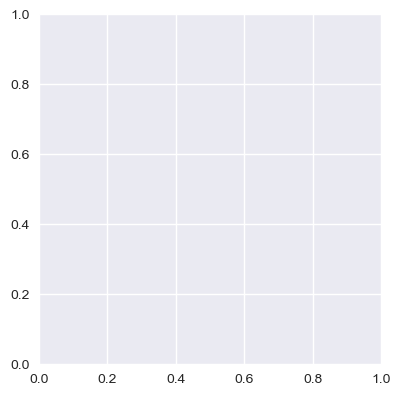

In [28]:
# 5. VISUALIZATION CREATION
print("\n\n5. CREATING VISUALIZATIONS")
print("-"*35)

# Set up the plotting environment
fig_size = (15, 10)
colors = px.colors.qualitative.Set3

# Visualization 1: Market Share by Make
plt.figure(figsize=fig_size)
top_makes = make_counts.head(15)
plt.subplot(2, 3, 1)
top_makes.plot(kind='bar', color=colors[:len(top_makes)])
plt.title('Top 15 EV Makes by Registration Count', fontsize=12, fontweight='bold')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)

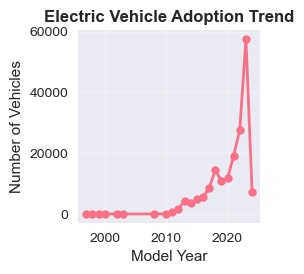

In [29]:
# Visualization 2: EV Adoption Over Time
plt.subplot(2, 3, 2)
model_year_counts.plot(kind='line', marker='o', linewidth=2, markersize=6)
plt.title('Electric Vehicle Adoption Trend', fontsize=12, fontweight='bold')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.grid(True, alpha=0.3)



5. CREATING VISUALIZATIONS
-----------------------------------


ValueError: 'rgb(141,211,199)' is not a valid color value.

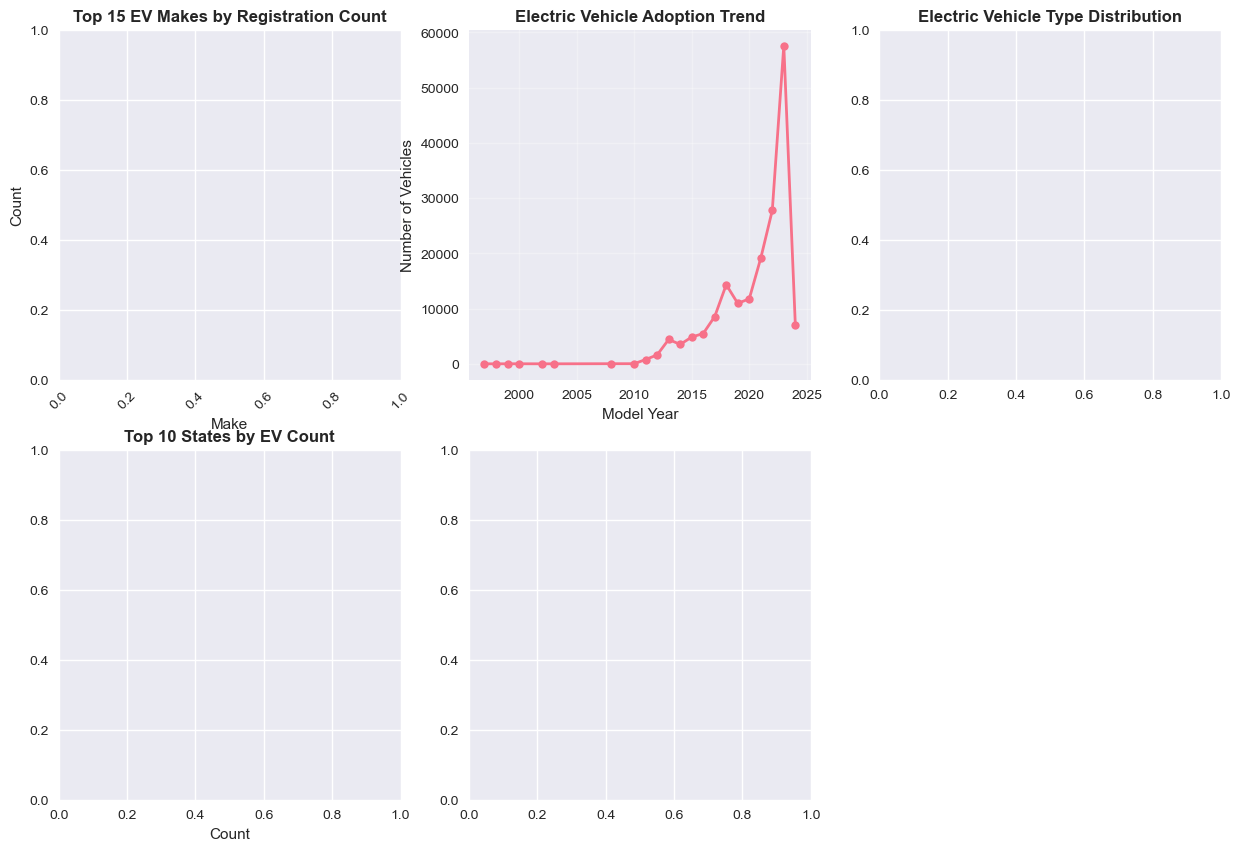

In [33]:
# 5. VISUALIZATION CREATION
print("\n\n5. CREATING VISUALIZATIONS")
print("-"*35)

# Set up the plotting environment
fig_size = (15, 10)
colors = px.colors.qualitative.Set3

# Visualization 1: Market Share by Make
plt.figure(figsize=fig_size)
top_makes = make_counts.head(15)
plt.subplot(2, 3, 1)
# top_makes.plot(kind='bar', color=colors[:len(top_makes)])
plt.title('Top 15 EV Makes by Registration Count', fontsize=12, fontweight='bold')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Visualization 2: EV Adoption Over Time
plt.subplot(2, 3, 2)
model_year_counts.plot(kind='line', marker='o', linewidth=2, markersize=6)
plt.title('Electric Vehicle Adoption Trend', fontsize=12, fontweight='bold')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.grid(True, alpha=0.3)

# Visualization 3: Vehicle Type Distribution
plt.subplot(2, 3, 3)
# ev_type_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Electric Vehicle Type Distribution', fontsize=12, fontweight='bold')
plt.ylabel('')

# Visualization 4: Geographic Distribution
plt.subplot(2, 3, 4)
top_states = state_counts.head(10)
# top_states.plot(kind='barh', color=colors[:len(top_states)])
plt.title('Top 10 States by EV Count', fontsize=12, fontweight='bold')
plt.xlabel('Count')

# Visualization 5: Electric Range Distribution
if 'Electric Range' in df.columns:
    plt.subplot(2, 3, 5)
    df[df['Electric Range'] > 0]['Electric Range'].hist(bins=30, alpha=0.7, color=colors[0])
    plt.title('Electric Range Distribution', fontsize=12, fontweight='bold')
    plt.xlabel('Electric Range (miles)')
    plt.ylabel('Frequency')

# Visualization 6: CAFV Eligibility
plt.subplot(2, 3, 6)
cafv_counts.plot(kind='bar', color=colors[:len(cafv_counts)])
plt.title('CAFV Eligibility Status', fontsize=12, fontweight='bold')
plt.xlabel('Eligibility Status')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 6. INTERACTIVE PLOTLY VISUALIZATIONS
print("\n\n6. INTERACTIVE VISUALIZATIONS")
print("-"*35)

# Interactive Visualization 1: Market Share Treemap
fig1 = px.treemap(
    values=make_counts.head(20).values,
    names=make_counts.head(20).index,
    title="Electric Vehicle Market Share - Top 20 Makes",
    color=make_counts.head(20).values,
    color_continuous_scale='Viridis'
)
fig1.show()

# Interactive Visualization 2: Time Series Analysis
yearly_data = df.groupby('Model Year').size().reset_index()
yearly_data.columns = ['Year', 'Count']

fig2 = px.line(
    yearly_data, 
    x='Year', 
    y='Count',
    title='Electric Vehicle Registration Trend Over Years',
    markers=True
)
fig2.update_layout(
    xaxis_title="Model Year",
    yaxis_title="Number of Registrations",
    hovermode='x'
)
fig2.show()

# Interactive Visualization 3: Geographic Heatmap
state_data = df['State'].value_counts().reset_index()
state_data.columns = ['State', 'Count']

fig3 = px.choropleth(
    state_data,
    locations='State',
    color='Count',
    locationmode='USA-states',
    title='Electric Vehicle Distribution Across US States',
    color_continuous_scale='Blues'
)
fig3.update_layout(geo_scope="usa")
fig3.show()

# Interactive Visualization 4: Make vs Range Analysis
if 'Electric Range' in df.columns:
    top_makes_list = make_counts.head(10).index.tolist()
    range_data = df[df['Make'].isin(top_makes_list) & (df['Electric Range'] > 0)]
    
    fig4 = px.box(
        range_data,
        x='Make',
        y='Electric Range',
        title='Electric Range Distribution by Top Makes',
        color='Make'
    )
    fig4.update_xaxis(tickangle=45)
    fig4.show()

# Interactive Visualization 5: Multi-dimensional Analysis
fig5 = px.scatter(
    df[df['Electric Range'] > 0],
    x='Model Year',
    y='Electric Range',
    color='Electric Vehicle Type',
    size='Electric Range',
    hover_data=['Make', 'Model'],
    title='Electric Vehicle Range Evolution Over Time'
)
fig5.show()